# Dicussion 6: Arctic Communities

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 1. Load data

In [17]:
fp = os.path.join('data', 'arctic_communities.geojson')
df = gpd.read_file(fp)

## 2. Check geometry types

In [18]:
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

In [19]:
if (df.geom_type == 'Polygon').all():
    print("All features are polygons")
else:
    print(f"Multiple feature types: {df.geom_type.unique()}")

Multiple feature types: ['MultiPolygon' 'Polygon']


In [20]:
# Write function to check polygons
def check_polygons(df):
    if (df.geom_type == 'Polygon').all():
        print("All features are polygons")
    else:
        print(f"Multiple feature types: {df.geom_type.unique()}")

In [21]:
# Call function to confirm multiple feature types
check_polygons(df)

Multiple feature types: ['MultiPolygon' 'Polygon']


## 3. Explode polygons

In [22]:
# Explode multi-part geometries into multiple single geometries
df = df.explode(index_parts=False).reset_index()

In [23]:
# Call function to check polygons
check_polygons(df)

All features are polygons


## 4. Compute minimum y-coordinate for polygons

In [24]:
# a. Select first row and return type
type(df.iloc[0])

pandas.core.series.Series

In [25]:
# b. Select geometry of first row and return type
type(df.iloc[0].geometry)

shapely.geometry.polygon.Polygon

In [26]:
# c. Find minimum y-coordinate for the first polygon in df
df.iloc[0].geometry.bounds[1]

56.511035156249996

In [27]:
# d. Create function that receives 1 row of geodf and returns min-y coordinate
def min_y(row):

    row_ymin = row.geometry.bounds[1]
    
    return row_ymin

In [ ]:
# e. Use apply() to create new column of minimum y-coordinates of each polygon
df['min_y_coord'] = df.apply(func=min_y, axis=1)

## 5. Filter, update CRS, & reproduce map


In [29]:
# Filter to minimum y-coord of 40 or greater
arctic = df[df['min_y_coord'] >= 40]

# Change crs
arctic = arctic.to_crs('EPSG:3413')

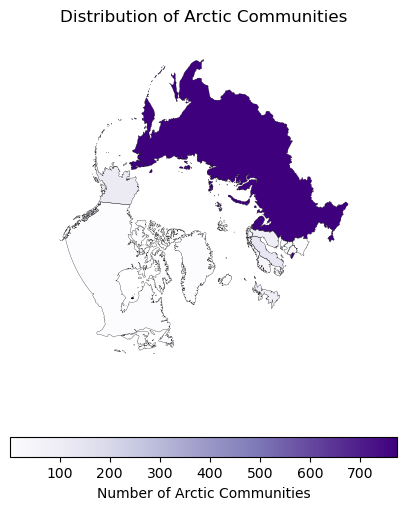

In [ ]:
# Create figure & ax
fig, ax = plt.subplots(figsize=(10,6))

# Turn off axis 
ax.axis('off')

# Plot boundaries
arctic.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

# Color by n_communities
arctic.plot(ax=ax, column='n_communities', cmap='Purples', legend = True, 
            legend_kwds={'orientation':'horizontal',
                         'label':"Number of Arctic Communities",
                         'shrink':0.5
                                                                                       })
plt.title("Distribution of Arctic Communities")
plt.show()